In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
import warnings
warnings.filterwarnings(action='ignore')

In [49]:
df = pd.read_csv('C:/Users/wkddn/OneDrive/문서/GitHub/Kaggle/kaggle/Pima Indians/diabetes.csv')
df.shape

(768, 9)

In [50]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
(df['Insulin']>0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [52]:
# Insulin이 0이 아닌 행들을 train 데이터 세트에 넣기
train = df[df['Insulin']>0].copy()
train.shape

(394, 9)

In [53]:
# Insulin이 0, 즉 회귀로 값을 채워줄 필요한 행을 test 데이터 세트에 넣기
test = df[df['Insulin']==0].copy()
test.shape

(374, 9)

In [54]:
feature_names = test.columns.tolist()
feature_names.remove('Insulin')
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [55]:
label_name = 'Insulin'
label_name

'Insulin'

In [56]:
# 학습에 사용할 문제
X_train = train[feature_names]
X_train.shape

(394, 8)

In [57]:
# 답인 Insulin이 들어있는 데이터를 만들기
# (열이 1개기 때문에 shape의 두번째 수가 비어있음)
y_train = train[label_name]
y_train.shape

(394,)

In [58]:
# 모델에서 실제로 풀어야 할 문제
X_test = test[feature_names]
X_test.shape

(374, 8)

In [59]:
# 실제 답
y_test = test[label_name]
y_test.shape

(374,)

## 머신러닝 알고리즘 가져오기

In [60]:
# Insulin 데이터는 수치형 데이터를 예측하므로 regression 사용
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model

DecisionTreeRegressor(random_state=42)

In [61]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [62]:
# cross vaildation으로 학습세트의 오차를 측정
# cv가 많으면 많을수록 시간은 오래 걸리지만 정확도가 증가
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv=5,
               verbose=2, n_jobs=-1 )
y_predict

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished


array([ 25., 480.,  55., 145., 495., 130., 220., 285., 176., 155., 237.,
       120.,  56., 415., 185.,  25.,  99., 215., 265., 210.,  90., 265.,
        59., 495., 125., 277., 220.,  94., 180.,  44., 115.,  86., 135.,
       291., 115.,  75., 100., 480.,  78.,  57., 180., 155.,  15.,  54.,
       220., 115., 330., 122.,  66.,  84., 168., 231.,  32., 194.,  58.,
       579.,  75.,  54., 106., 120., 106.,  96., 321.,  49., 318.,  70.,
        87., 152., 158., 291.,  99., 145., 231., 167., 100., 165.,  25.,
       210., 190., 150., 110.,  87., 293.,  66.,  49., 342., 100.,  89.,
        49., 846., 110., 192., 204., 130., 235., 182., 191., 166.,  49.,
       105., 207., 115., 250.,  74., 140., 215., 152., 167., 215.,  71.,
        56., 249., 120., 540.,  43.,  37., 207., 210., 130., 465., 310.,
       146.,  40., 190., 392., 237., 200., 190., 142.,  60., 110.,  89.,
       182., 144., 495., 600., 235., 150.,  86., 200., 125., 176., 210.,
       250., 293.,  79., 152.,  46., 291.,  48.,  7

In [63]:
(y_predict == y_train).sum() # 정답을 정확하게 맞춘 갯수

3

<AxesSubplot:xlabel='Insulin'>

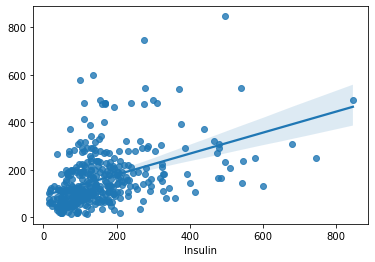

In [64]:
sns.regplot(y_train, y_predict)

In [65]:
# r2_score는 회귀가 잘 되었는지 측정 (1에 가까울수록 잘 예측한 것)
from sklearn.metrics import r2_score
r2_score(y_train, y_predict)

-0.14429295602725567

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

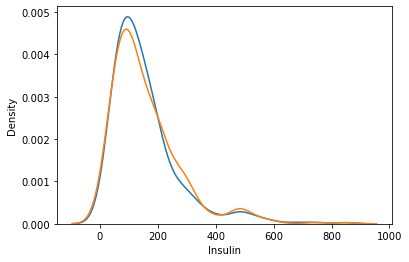

In [66]:
sns.distplot(y_train, hist=False, label="train")
sns.distplot(y_predict, hist=False, label="predict")

In [67]:
error = abs(y_train - y_predict)
error.mean()

86.57106598984771

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

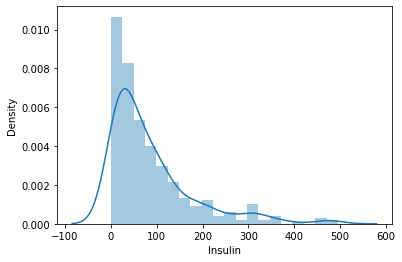

In [68]:
sns.distplot(error)

In [69]:
error.describe()

count    394.000000
mean      86.571066
std       92.896321
min        0.000000
25%       22.250000
50%       55.000000
75%      115.000000
max      495.000000
Name: Insulin, dtype: float64

In [70]:
# RMSE 계산
np.sqrt(((y_train - y_predict) ** 2).mean())

126.89512636995443

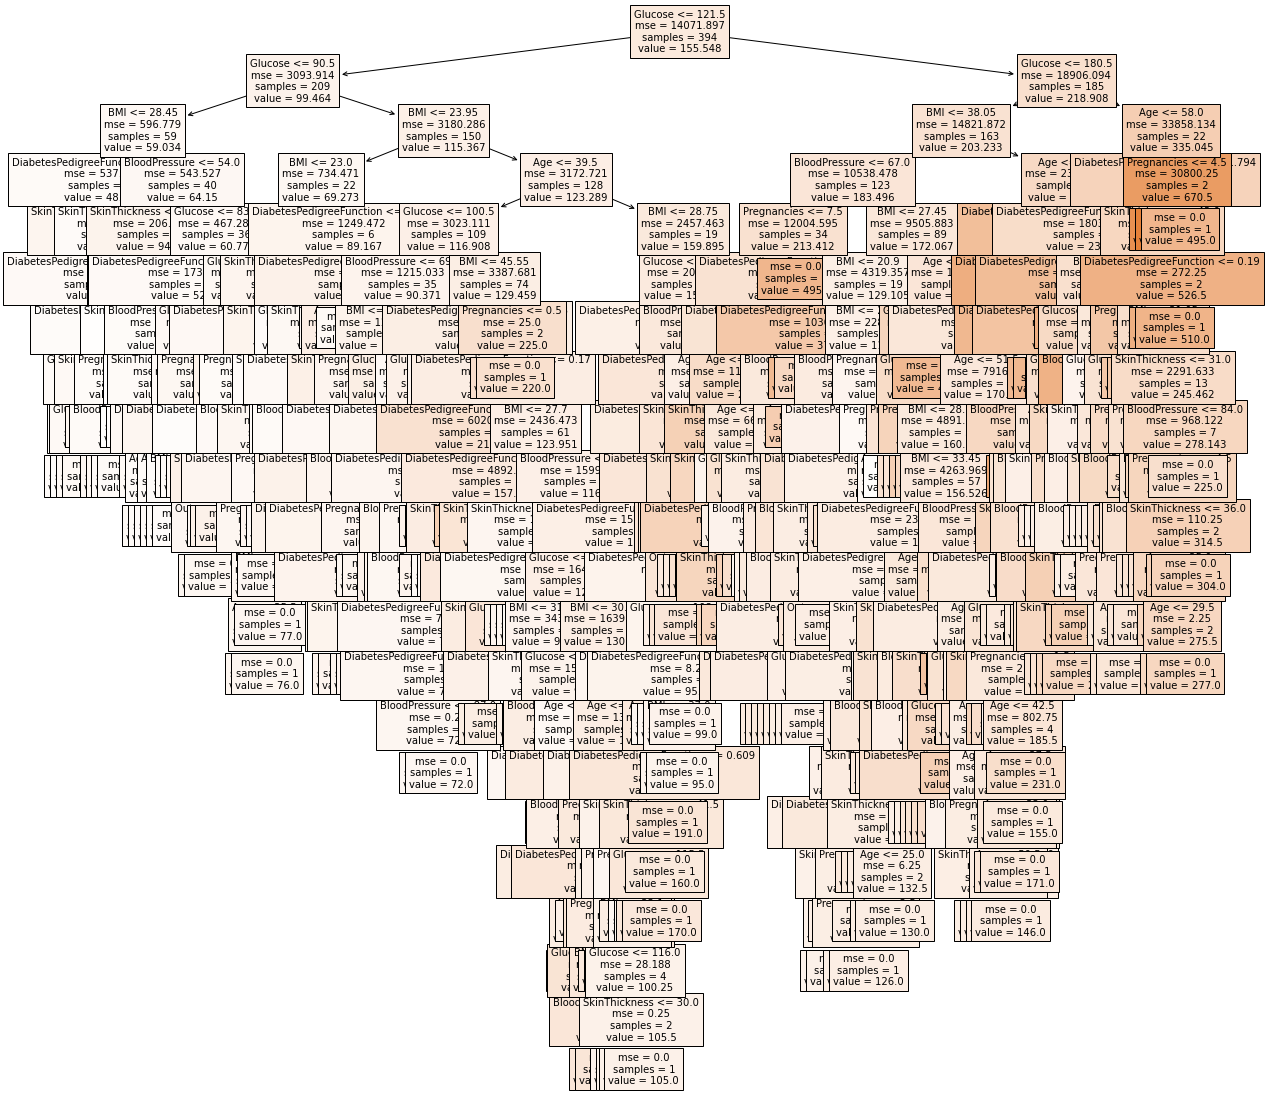

In [71]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names = feature_names, filled=True,
                fontsize=10)

In [72]:
# feature의 중요도 추출
model.feature_importances_

array([4.20201517e-02, 4.08219914e-01, 6.24932543e-02, 5.97519119e-02,
       1.10296456e-01, 1.63917473e-01, 1.52984660e-01, 3.16179009e-04])

<AxesSubplot:>

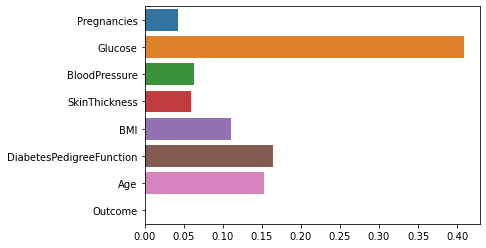

In [73]:
# 중요도 시각화
# Glucose, BMI, Funcdtion이 중요한 것을 알 수 있음
sns.barplot(x=model.feature_importances_, y=feature_names)

In [74]:
y_test = model.predict(X_test)
y_test[:5]

array([168.,  37., 145.,  36., 182.])

In [75]:
train.groupby('Outcome')['Insulin'].agg(['mean','median'])

,mean,median
Outcome,,
0,130.287879,102.5
1,206.846154,169.5


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

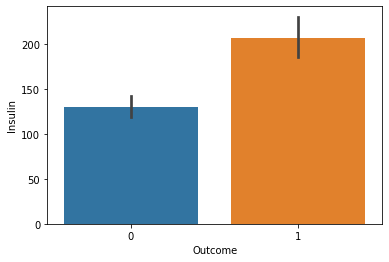

In [76]:
sns.barplot(data=train, x='Outcome', y='Insulin')

In [77]:
test['Insulin'] = y_test

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

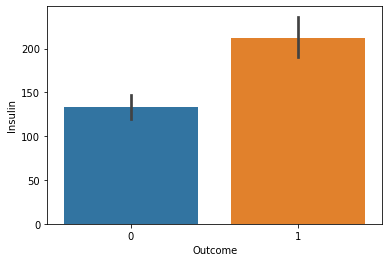

In [78]:
sns.barplot(data=test, x='Outcome', y='Insulin')


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

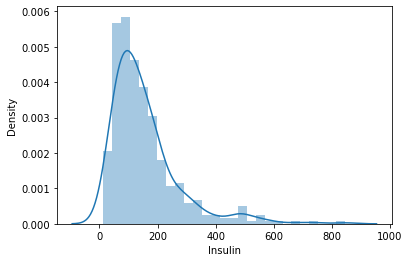

In [79]:
sns.distplot(train['Insulin'])

<AxesSubplot:xlabel='Insulin'>

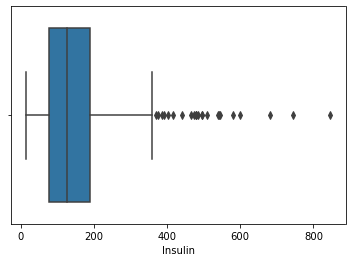

In [80]:
sns.boxplot(train['Insulin'])

In [81]:
desc = train['Insulin'].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [82]:
# IQR = 3IQR - 1QR
# 이상치 = 3IQR + (IQR*1.5)
IQR = desc.loc['75%'] - desc.loc['25%']
OUT = desc.loc['75%'] + (IQR * 1.5)

In [83]:
train[train['Insulin']>OUT].shape

(24, 9)

In [84]:
train = train[train['Insulin']<600]
train.shape

(390, 9)

<AxesSubplot:xlabel='Insulin'>

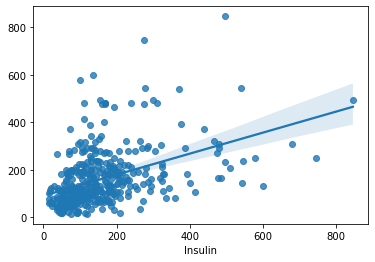

In [85]:
sns.regplot(y_train, y_predict)

In [86]:
error = abs(y_train - y_predict)
error.mean()

86.57106598984771

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

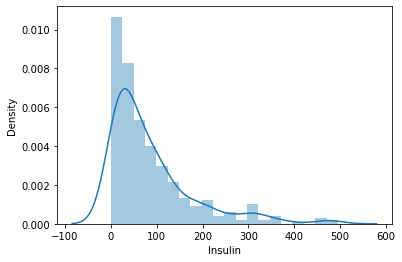

In [87]:
sns.distplot(error)

In [88]:
error.describe()

count    394.000000
mean      86.571066
std       92.896321
min        0.000000
25%       22.250000
50%       55.000000
75%      115.000000
max      495.000000
Name: Insulin, dtype: float64

In [89]:
np.sqrt(((y_train - y_predict) ** 2).mean())

126.89512636995443

In [90]:
train = train[train['Insulin']<OUT]
train.shape

(370, 9)

<AxesSubplot:xlabel='Insulin'>

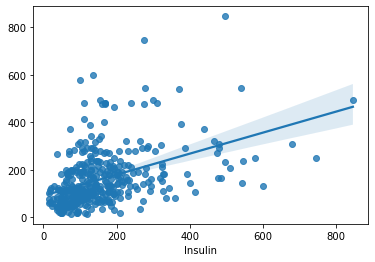

In [91]:
# 선 주변에 많이 모여야 좋은데 떨어져있으니 예측의 정확도가 떨어짐
sns.regplot(y_train, y_predict)

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

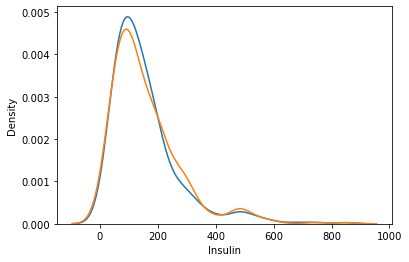

In [92]:
sns.distplot(y_train, hist=False, label='train')
sns.distplot(y_predict, hist=False, label='predict')

In [93]:
error = abs(y_train - y_predict)
error.mean()

86.57106598984771

In [97]:
max_depth = np.random.randint(5, 30, 10)
max_depth

array([27, 11,  6, 20, 26,  9, 14, 29, 21, 21])

In [98]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.498087  , 0.49452554, 0.71625033, 0.81587641, 0.81806493,
       0.55277229, 0.3997938 , 0.78732926, 0.92442837, 0.6013089 ])

In [99]:
# RandomizedSearchCV 활용
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'max_depth': max_depth, 
                        'max_features':max_features}

regressor = RandomizedSearchCV(model, param_distributions,
                                n_iter=10, scoring=None, cv=5,
                                verbose=2, random_state=42)

In [104]:
# 전체적으로 5 * 10 = 50번 학습을 반복
regressor.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......max_depth=21, max_features=0.8158764099307603; total time=   0.0s
[CV] END ......max_depth=21, max_features=0.8158764099307603; total time=   0.0s
[CV] END ......max_depth=21, max_features=0.8158764099307603; total time=   0.0s
[CV] END ......max_depth=21, max_features=0.8158764099307603; total time=   0.0s
[CV] END ......max_depth=21, max_features=0.8158764099307603; total time=   0.0s
[CV] END .......max_depth=9, max_features=0.8158764099307603; total time=   0.0s
[CV] END .......max_depth=9, max_features=0.8158764099307603; total time=   0.0s
[CV] END .......max_depth=9, max_features=0.8158764099307603; total time=   0.0s
[CV] END .......max_depth=9, max_features=0.8158764099307603; total time=   0.0s
[CV] END .......max_depth=9, max_features=0.8158764099307603; total time=   0.0s
[CV] END .....max_depth=29, max_features=0.49808699685827695; total time=   0.0s
[CV] END .....max_depth=29, max_features=0.49808

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'max_depth': array([27, 11,  6, 20, 26,  9, 14, 29, 21, 21]),
                                        'max_features': array([0.498087  , 0.49452554, 0.71625033, 0.81587641, 0.81806493,
       0.55277229, 0.3997938 , 0.78732926, 0.92442837, 0.6013089 ])},
                   random_state=42, verbose=2)

In [105]:
# 가장 성능이 좋은 parameter 찾기
regressor.best_params_

{'max_features': 0.7162503251695178, 'max_depth': 6}

In [106]:
# 가장 성능이 좋은 parameter가 들어간 모델의 모든 estimator 출력
regressor.best_estimator_

DecisionTreeRegressor(max_depth=6, max_features=0.7162503251695178,
                      random_state=42)

In [107]:
# 가장 좋은 score 출력
regressor.best_score_

-0.09726166795558182

In [108]:
# 딕셔너리 형태로 얼마나 시간이 걸렸는지, 스코어 등까지 출력
regressor.cv_results_

{'mean_fit_time': array([0.00375018, 0.00332303, 0.00293083, 0.00212278, 0.00242634,
        0.00267539, 0.00198674, 0.00251422, 0.0022861 , 0.00239234]),
 'std_fit_time': array([8.19490523e-04, 3.67322782e-04, 6.32235606e-04, 2.31281732e-04,
        5.50254531e-04, 5.68287947e-04, 5.11706483e-05, 4.67718959e-04,
        5.99027230e-04, 7.96913099e-04]),
 'mean_score_time': array([0.00141039, 0.00164814, 0.00121536, 0.00143909, 0.00121489,
        0.00123296, 0.00104909, 0.00120234, 0.00133209, 0.00119815]),
 'std_score_time': array([5.07063051e-04, 3.74128282e-04, 3.95426298e-04, 4.95151434e-04,
        3.91923411e-04, 4.16630136e-04, 4.73903693e-05, 3.99904565e-04,
        4.18466444e-04, 3.98025336e-04]),
 'param_max_features': masked_array(data=[0.8158764099307603, 0.8158764099307603,
                    0.49808699685827695, 0.5527722910842221,
                    0.81806492837349, 0.6013088977766008,
                    0.7162503251695178, 0.49808699685827695,
                    

In [120]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state=42),
                      RandomForestRegressor(random_state=42),
                      GradientBoostingRegressor(random_state=42)]
estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [122]:
# 모델을 for문을 돌면서 하나씩 클래스 이름만 리스트에 넣어주기
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)
pd.DataFrame(results)

,0
0,DecisionTreeRegressor
1,RandomForestRegressor
2,GradientBoostingRegressor


In [125]:
# regressor_best_params_를 append 시켜줌
# 모델 3개의 로그를 보여주면서 학습을 하여 result에 결과가 들어감
from sklearn.model_selection import RandomizedSearchCV

results = [ ]
for estimator in estimators:
    result = [ ]

    max_depth = np.random.randint(5, 30, 10)
    max_features = np.random.uniform(0.3, 1.0, 10)

    param_distributions = {"max_depth" : max_depth,
"max_features" : max_features}

    regressor = RandomizedSearchCV(estimator,
        param_distributions,
        n_iter=10,
        scoring=None,
        cv=5,
        verbose=2, random_state=42)

    regressor.fit(X_train, y_train)

    result.append(estimator.__class__.__name__)
    results.append(regressor.best_params_)
    results.append(regressor.best_estimator_)
    results.append(regressor.best_score_)
    results.append(regressor.cv_results_)
    results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......max_depth=13, max_features=0.8992356353693134; total time=   0.0s
[CV] END ......max_depth=13, max_features=0.8992356353693134; total time=   0.0s
[CV] END ......max_depth=13, max_features=0.8992356353693134; total time=   0.0s
[CV] END ......max_depth=13, max_features=0.8992356353693134; total time=   0.0s
[CV] END ......max_depth=13, max_features=0.8992356353693134; total time=   0.0s
[CV] END ......max_depth=19, max_features=0.8992356353693134; total time=   0.0s
[CV] END ......max_depth=19, max_features=0.8992356353693134; total time=   0.0s
[CV] END ......max_depth=19, max_features=0.8992356353693134; total time=   0.0s
[CV] END ......max_depth=19, max_features=0.8992356353693134; total time=   0.0s
[CV] END ......max_depth=19, max_features=0.8992356353693134; total time=   0.0s
[CV] END ......max_depth=27, max_features=0.6117634374631487; total time=   0.0s
[CV] END ......max_depth=27, max_features=0.6117